In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [2]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') >
                0.998):  # it actually never reaches this hight accuracy
            print("\nReached 99.8% accuracy so cancelling training!")
            self.model.stop_training = True

In [3]:
# create instance from the callbacks
callbacks = myCallback()
mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images,
                                     test_labels) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Applying feature scaling on images to be in the type (floating point number)

training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

In [5]:
# Creating out model with conv and pooling layers

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3),
                           activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(training_images,
          training_labels,
          epochs=10,
          validation_data=(test_images, test_labels),
          callbacks=[callbacks])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9127 - loss: 0.2975 - val_accuracy: 0.9788 - val_loss: 0.0626
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9845 - loss: 0.0497 - val_accuracy: 0.9836 - val_loss: 0.0516
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9906 - loss: 0.0305 - val_accuracy: 0.9858 - val_loss: 0.0413
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9944 - loss: 0.0178 - val_accuracy: 0.9856 - val_loss: 0.0463
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9964 - loss: 0.0124 - val_accuracy: 0.9859 - val_loss: 0.0446
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9973 - loss: 0.0082 - val_accuracy: 0.9833 - val_loss: 0.0552
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9980 - loss: 0.0061 - val_accuracy: 0.9842 - val_loss: 0.0598
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9981 - loss: 0.0060 - 

In [9]:
v = model.history.history
v

{'accuracy': [0.9557499885559082,
  0.9846333265304565,
  0.9899166822433472,
  0.9935666918754578,
  0.9955999851226807,
  0.9967333078384399,
  0.9977166652679443,
  0.9979833364486694,
  0.9980999827384949],
 'loss': [0.14858102798461914,
  0.049736835062503815,
  0.03163384646177292,
  0.02017959952354431,
  0.014067797921597958,
  0.009922128170728683,
  0.00704802805557847,
  0.005885188467800617,
  0.005725199822336435],
 'val_accuracy': [0.9787999987602234,
  0.9836000204086304,
  0.98580002784729,
  0.9855999946594238,
  0.9858999848365784,
  0.983299970626831,
  0.9842000007629395,
  0.9857000112533569,
  0.9872999787330627],
 'val_loss': [0.0626448392868042,
  0.05160241201519966,
  0.041315555572509766,
  0.04632000997662544,
  0.04456159844994545,
  0.05518424138426781,
  0.05977573245763779,
  0.05920545756816864,
  0.052156347781419754]}

In [10]:
from tensorflow.keras.utils import plot_model

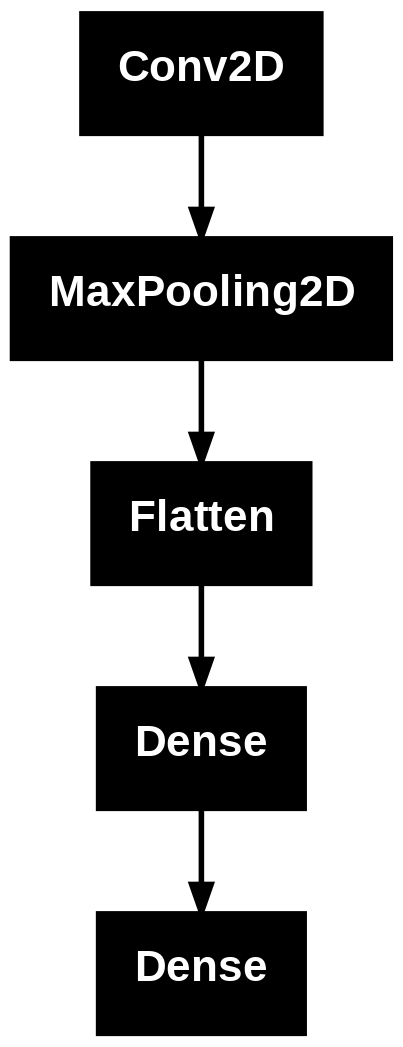

In [11]:
plot_model(model)
